In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
gdf_dxf = gpd.read_file('GIS/bases-DXF/Base - CONFLITO DE PROGRAMAS.dxf', encoding='ANSI_1252')

In [3]:
# gdf_dxf2 = gpd.read_file('GIS/bases-DXF/Bairro dos Casa.dxf', encoding='ANSI_1252')

In [4]:
# gdf_dxf2.loc[gdf_dxf2.Layer == 'MCT - PASSAGEM SANTOS DIAS DA SILVA', 'Layer'] = 'PASSAGEM SANTOS DIAS DA SILVA - DJI_0042'

In [5]:
gdf_dxf

,Layer,PaperSpace,SubClasses,Linetype,EntityHandle,Text,geometry
0,RUA PASQUALE SCARANO - 12_12_20 - PASTA ETAPA ...,None,AcDbEntity:AcDb2dPolyline,Continuous,6F,None,"LINESTRING Z (337753.229 7374267.099 0.000, 33..."
1,MCT - RUA THELMA,None,AcDbEntity:AcDb2dPolyline,Continuous,75,None,"LINESTRING Z (337862.023 7374372.934 0.000, 33..."
2,MCT - VIELA 05,None,AcDbEntity:AcDb2dPolyline,Continuous,7B,None,"LINESTRING Z (337732.971 7374345.007 0.000, 33..."
3,MCT - VIELA 07,None,AcDbEntity:AcDb2dPolyline,Continuous,81,None,"LINESTRING Z (337697.676 7374479.797 0.000, 33..."
4,RUA EDGARD DE SOUZA - 12_12_20 - PASTA ETAPA 0...,None,AcDbEntity:AcDb2dPolyline,Continuous,87,None,"LINESTRING Z (337787.743 7374082.512 0.000, 33..."
...,...,...,...,...,...,...,...
76,RUA NORA ASTORGA - 11_12_20 - DJI_0015 - DJI_0016,None,AcDbEntity:AcDbLine,Continuous,153,None,"LINESTRING Z (336665.680 7371622.573 0.000, 33..."
77,RUA NORA ASTORGA - 11_12_20 - DJI_0015 - DJI_0016,None,AcDbEntity:AcDbLine,Continuous,154,None,"LINESTRING Z (336658.803 7371626.056 0.000, 33..."
78,RUA NORA ASTORGA - 11_12_20 - DJI_0015 - DJI_0016,None,AcDbEntity:AcDbLine,Continuous,155,None,"LINESTRING Z (336651.172 7371628.692 0.000, 33..."
79,RUA NORA ASTORGA - 11_12_20 - DJI_0015 - DJI_0016,None,AcDbEntity:AcDbLine,Continuous,156,None,"LINESTRING Z (336620.459 7371635.188 0.000, 33..."


In [6]:
# gdf_dxf = gpd.GeoDataFrame(pd.concat([gdf_dxf, gdf_dxf2]).reset_index().drop('index', axis=1))

<AxesSubplot:>

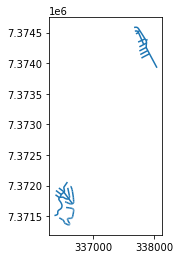

In [7]:
gdf_dxf.plot()

In [8]:
gdf_dxf['Layer'] = gdf_dxf.Layer.str.encode(encoding='raw_unicode_escape').str.decode(encoding='utf-8').str.replace('MCT - ', '')

In [9]:
gdf_dxf['Layer'] = gdf_dxf.Layer.str.replace('MCT -', '')

In [10]:
gdf_dxf['lista'] = gdf_dxf.Layer.str.split(' - ')

In [11]:
gdf_dxf['DJI'] = gdf_dxf.Layer.str.findall('DJI_[0-9]{4}')

In [12]:
gdf_dxf['etapa'] = gdf_dxf.Layer.str.extract('(ETAPA [0-9]{1,2})')

In [13]:
gdf_dxf['data_voo'] = gdf_dxf.Layer.str.extract('([0-9]{1,2}_[0-9]{2}_[0-9]{2})')

In [14]:
gdf_dxf['logradouro'] = gdf_dxf.lista.apply(lambda x: x[0])

In [15]:
gdf_dxf

,Layer,PaperSpace,SubClasses,Linetype,EntityHandle,Text,geometry,lista,DJI,etapa,data_voo,logradouro
0,RUA PASQUALE SCARANO - 12_12_20 - PASTA ETAPA ...,None,AcDbEntity:AcDb2dPolyline,Continuous,6F,None,"LINESTRING Z (337753.229 7374267.099 0.000, 33...","[RUA PASQUALE SCARANO, 12_12_20, PASTA ETAPA 0...",[DJI_0056],ETAPA 01,12_12_20,RUA PASQUALE SCARANO
1,RUA THELMA,None,AcDbEntity:AcDb2dPolyline,Continuous,75,None,"LINESTRING Z (337862.023 7374372.934 0.000, 33...",[RUA THELMA],[],NaN,NaN,RUA THELMA
2,VIELA 05,None,AcDbEntity:AcDb2dPolyline,Continuous,7B,None,"LINESTRING Z (337732.971 7374345.007 0.000, 33...",[VIELA 05],[],NaN,NaN,VIELA 05
3,VIELA 07,None,AcDbEntity:AcDb2dPolyline,Continuous,81,None,"LINESTRING Z (337697.676 7374479.797 0.000, 33...",[VIELA 07],[],NaN,NaN,VIELA 07
4,RUA EDGARD DE SOUZA - 12_12_20 - PASTA ETAPA 0...,None,AcDbEntity:AcDb2dPolyline,Continuous,87,None,"LINESTRING Z (337787.743 7374082.512 0.000, 33...","[RUA EDGARD DE SOUZA, 12_12_20, PASTA ETAPA 01...",[DJI_0059],ETAPA 01,12_12_20,RUA EDGARD DE SOUZA
...,...,...,...,...,...,...,...,...,...,...,...,...
76,RUA NORA ASTORGA - 11_12_20 - DJI_0015 - DJI_0016,None,AcDbEntity:AcDbLine,Continuous,153,None,"LINESTRING Z (336665.680 7371622.573 0.000, 33...","[RUA NORA ASTORGA, 11_12_20, DJI_0015, DJI_0016]","[DJI_0015, DJI_0016]",NaN,11_12_20,RUA NORA ASTORGA
77,RUA NORA ASTORGA - 11_12_20 - DJI_0015 - DJI_0016,None,AcDbEntity:AcDbLine,Continuous,154,None,"LINESTRING Z (336658.803 7371626.056 0.000, 33...","[RUA NORA ASTORGA, 11_12_20, DJI_0015, DJI_0016]","[DJI_0015, DJI_0016]",NaN,11_12_20,RUA NORA ASTORGA
78,RUA NORA ASTORGA - 11_12_20 - DJI_0015 - DJI_0016,None,AcDbEntity:AcDbLine,Continuous,155,None,"LINESTRING Z (336651.172 7371628.692 0.000, 33...","[RUA NORA ASTORGA, 11_12_20, DJI_0015, DJI_0016]","[DJI_0015, DJI_0016]",NaN,11_12_20,RUA NORA ASTORGA
79,RUA NORA ASTORGA - 11_12_20 - DJI_0015 - DJI_0016,None,AcDbEntity:AcDbLine,Continuous,156,None,"LINESTRING Z (336620.459 7371635.188 0.000, 33...","[RUA NORA ASTORGA, 11_12_20, DJI_0015, DJI_0016]","[DJI_0015, DJI_0016]",NaN,11_12_20,RUA NORA ASTORGA


In [16]:
pd_videos = pd.DataFrame(list(map(lambda x: 
         list(map(lambda y: y + '.MOV', x))
         , gdf_dxf.DJI))).add_prefix('Video_')

In [17]:
pd_videos

,Video_0,Video_1
0,DJI_0056.MOV,None
1,None,None
2,None,None
3,None,None
4,DJI_0059.MOV,None
...,...,...
76,DJI_0015.MOV,DJI_0016.MOV
77,DJI_0015.MOV,DJI_0016.MOV
78,DJI_0015.MOV,DJI_0016.MOV
79,DJI_0015.MOV,DJI_0016.MOV


In [18]:
gdf_dxf = gdf_dxf.merge(pd_videos, left_index=True, right_index=True)

In [19]:
gdf_dxf.columns

Index(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text',
       'geometry', 'lista', 'DJI', 'etapa', 'data_voo', 'logradouro',
       'Video_0', 'Video_1'],
      dtype='object')

In [20]:
gdf_dxf.loc[gdf_dxf.etapa.isna(), 'etapa'] = ''

In [21]:
gdf_dxf.etapa = gdf_dxf.etapa.str.replace(' ', '_')

In [22]:
gdf_dxf.loc[gdf_dxf.etapa != '', 'etapa'] += '/'

In [23]:
gdf_dxf.loc[~gdf_dxf.data_voo.isna(), 'data_voo'] += '/'

In [24]:
for c in gdf_dxf.loc[:, gdf_dxf.columns.str.startswith('Video')].columns:
    gdf_dxf[c + '_path'] = 'videos/' + gdf_dxf.data_voo + gdf_dxf.etapa + gdf_dxf[c]

In [25]:
gdf_dxf = gdf_dxf.dissolve(by=['Layer'], aggfunc='first').reset_index()

In [26]:
gdf_dxf.crs = 'epsg:31983'

In [29]:
gdf_dxf.drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text', 'DJI', 'lista'], axis=1).to_file('./videos/ruas-videos-CONFLITO-DE-PROGRAMAS.gpkg', driver='GPKG')

In [30]:
gdf_dxf.dtypes

Layer             object
geometry        geometry
PaperSpace        object
SubClasses        object
Linetype          object
EntityHandle      object
Text              object
lista             object
DJI               object
etapa             object
data_voo          object
logradouro        object
Video_0           object
Video_1           object
Video_0_path      object
Video_1_path      object
dtype: object